# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("processed.csv", index_col=0)
df.head()

,accessed_Ffom,age,gender,country,membership,language,returned,pay_method
0,Chrome,28,Female,CA,Normal,English,No,Credit Card
1,Mozilla Firefox,21,Male,AR,Normal,English,No,Debit Card
2,Mozilla Firefox,20,Male,PL,Normal,English,No,Cash
3,Mozilla Firefox,66,Female,IN,Normal,Spanish,No,Credit Card
4,Mozilla Firefox,53,Female,KR,Normal,Spanish,No,Cash


## Age Distribution

Text(0.5, 1.0, 'Ages of Users')

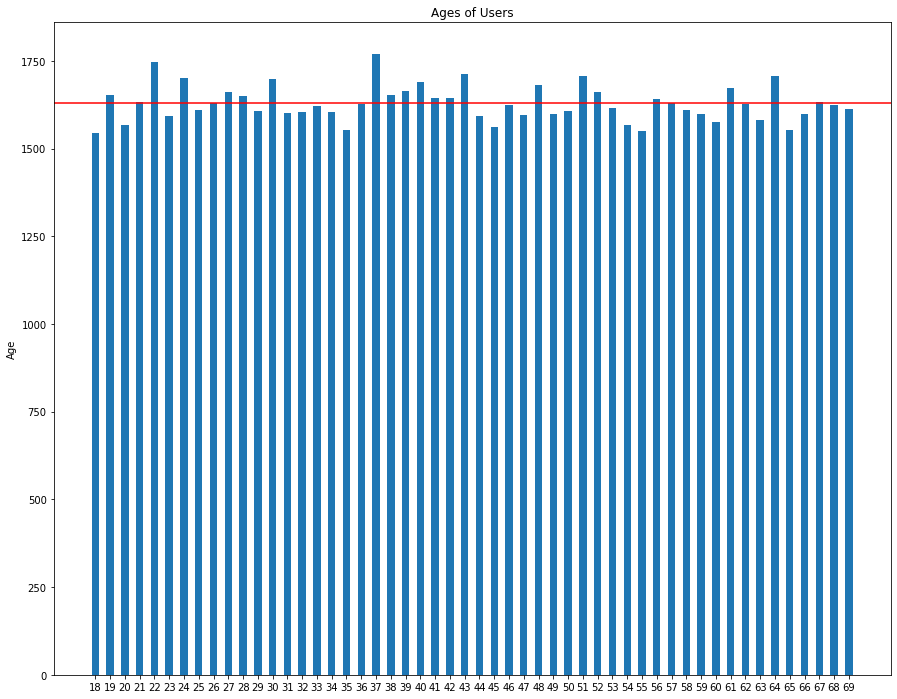

In [3]:
ages = df['age'].value_counts().sort_index()
plt.figure(figsize=(15,12))
plt.bar(ages.index, ages.values, 0.5, tick_label=ages.index)
plt.axhline(ages.values.mean(), color='r')
#, title="Ages of Users", ylabel="Age")
plt.ylabel("Age")
plt.title("Ages of Users")
#.plot(kind='barh', figsize=(15,12), title="Ages of Users", ylabel="Age")

In [4]:
print("Top 5 Ages")
df['age'].value_counts(normalize=True).sort_values(ascending=False).head(5)

Top 5 Ages


37    0.020906
22    0.020622
43    0.020209
51    0.020162
64    0.020150
Name: age, dtype: float64

## Gender Distribution

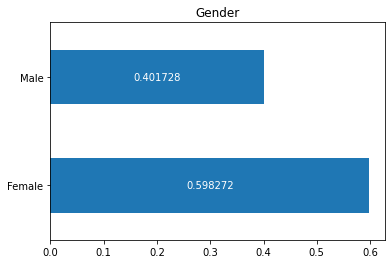

In [5]:
ax = df['gender'].value_counts(normalize=True).plot(kind='barh', title='Gender')
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white')

## Target variable distribution

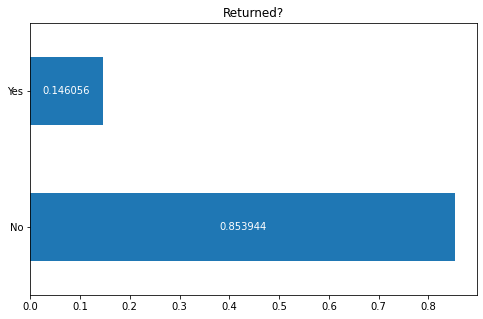

In [6]:
ax = df['returned'].value_counts(normalize=True).plot(kind='barh', figsize=(8,5), title='Returned?')
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white')

## Payment Method Distribution

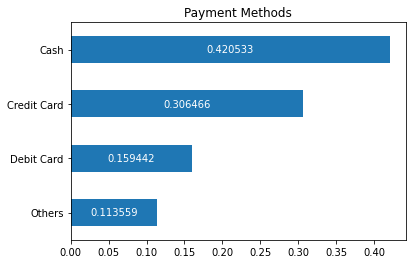

In [7]:
ax = df['pay_method'].value_counts(ascending=True, normalize=True).plot(kind='barh', title="Payment Methods")
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white')

## Membership Distribution

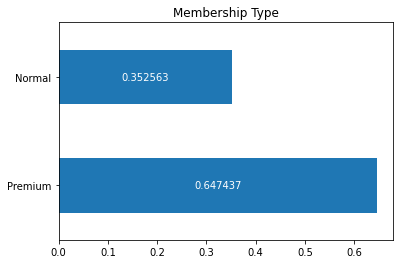

In [8]:
ax = df['membership'].value_counts(normalize=True).plot(kind='barh', title="Membership Type")
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white')

## Language Distribution

<Axes: title={'center': 'Languages'}>

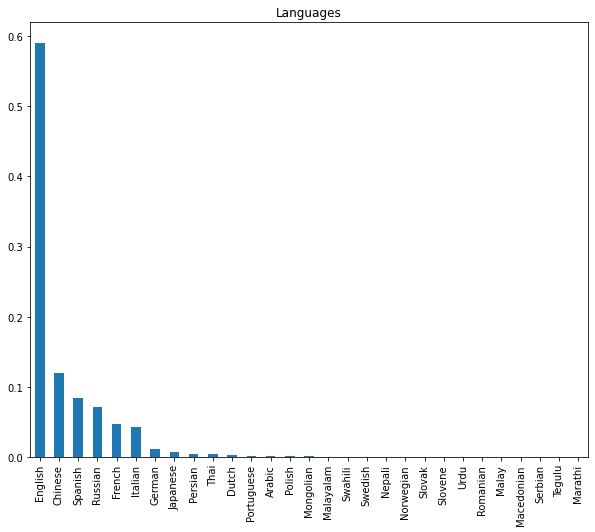

In [9]:
df['language'].value_counts(normalize=True).plot(kind='bar', title="Languages", figsize=(10,8))

In [10]:
print("Top 5 Languages")
df['language'].value_counts(normalize=True).sort_values(ascending=False).head(5)

Top 5 Languages


English    0.589501
Chinese    0.120075
Spanish    0.084095
Russian    0.070980
French     0.046887
Name: language, dtype: float64

## Access Method Distribution

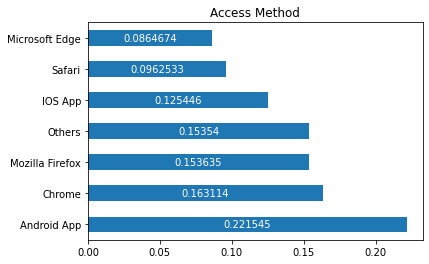

In [11]:
ax = df['accessed_Ffom'].value_counts(normalize=True).plot(kind='barh', title="Access Method")
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white')

## Country Distribution

<Axes: title={'center': 'Country'}>

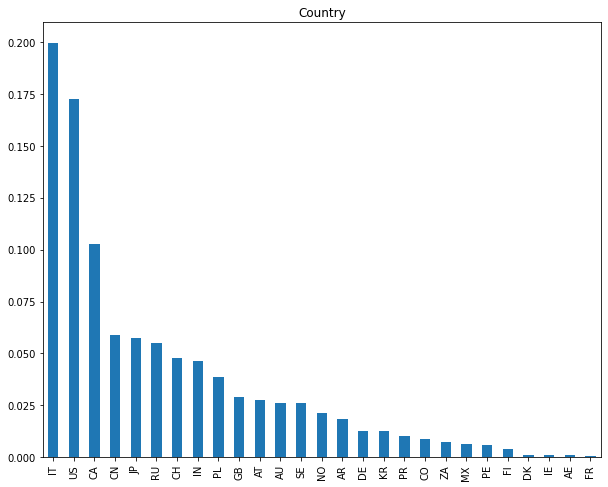

In [12]:
df['country'].value_counts(normalize=True).plot(kind='bar', title="Country", figsize=(10,8))

In [13]:
print("Top 5 Countries")
df['country'].value_counts(normalize=True).sort_values(ascending=False).head(5)

Top 5 Countries


IT    0.199400
US    0.172474
CA    0.102639
CN    0.058880
JP    0.057665
Name: country, dtype: float64

# Returned Items Only

In [14]:
df_returned = df[df["returned"] == 'Yes']
df_returned.head()

,accessed_Ffom,age,gender,country,membership,language,returned,pay_method
6,Mozilla Firefox,49,Female,CN,Normal,English,Yes,Cash
22,IOS App,52,Male,JP,Premium,English,Yes,Credit Card
27,Microsoft Edge,50,Male,CA,Premium,Spanish,Yes,Cash
32,Safari,32,Female,IT,Premium,Spanish,Yes,Credit Card
51,IOS App,41,Female,US,Premium,Spanish,Yes,Others


## Age Distribution

Text(0.5, 1.0, 'Ages of Users (Returns Only)')

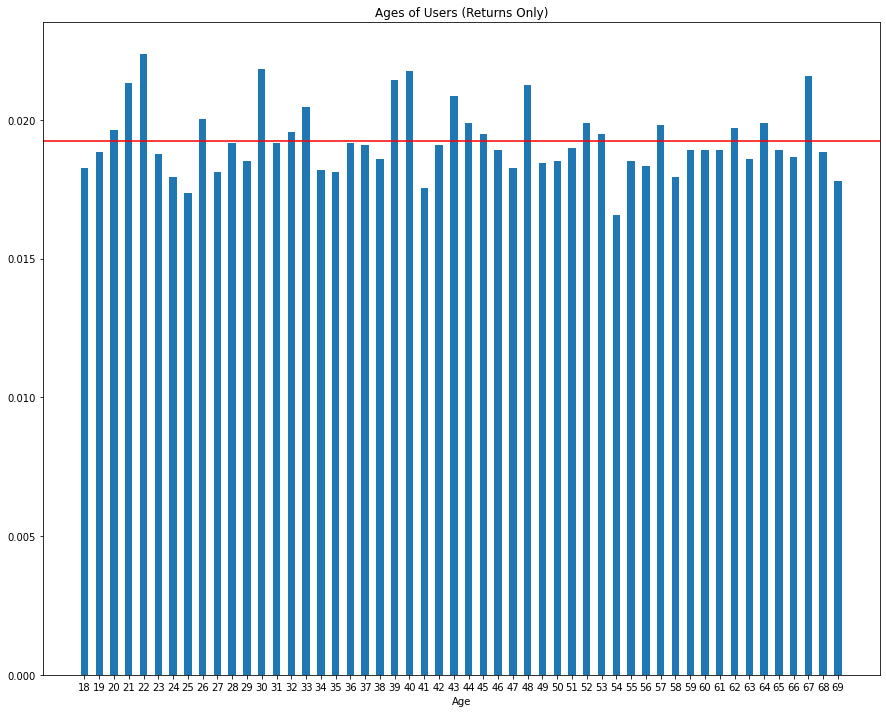

In [15]:
ages = df_returned['age'].value_counts(normalize=True).sort_index()
plt.figure(figsize=(15,12))
plt.bar(ages.index, ages.values, 0.5, tick_label=ages.index)
plt.axhline(ages.values.mean(), color='r')
#, title="Ages of Users", ylabel="Age")
plt.xlabel("Age")
plt.title("Ages of Users (Returns Only)")
#.plot(kind='barh', figsize=(15,12), title="Ages of Users", ylabel="Age")

In [16]:
print("Top 5 Ages (Returns Only)")
df_returned['age'].value_counts(normalize=True).sort_values(ascending=False).head(5)

Top 5 Ages (Returns Only)


22    0.022387
30    0.021822
40    0.021741
67    0.021579
39    0.021418
Name: age, dtype: float64

## Gender Distribution

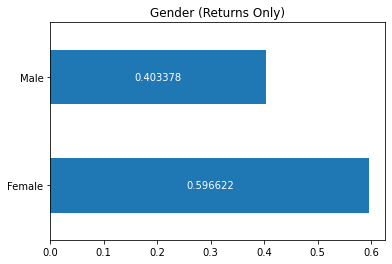

In [17]:
ax = df_returned['gender'].value_counts(normalize=True).plot(kind='barh',title='Gender (Returns Only)')
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white')

## Payment Method Distribution

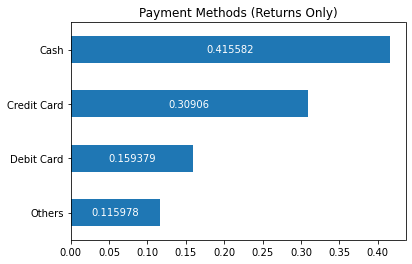

In [18]:
ax = df_returned['pay_method'].value_counts(ascending=True, normalize=True).plot(kind='barh', title="Payment Methods (Returns Only)")
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white')

## Membership Distribution

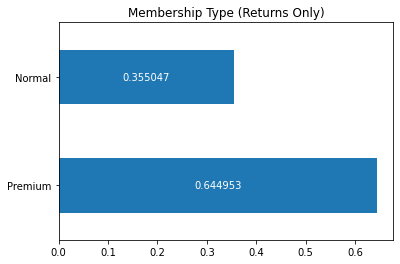

In [19]:
ax = df_returned['membership'].value_counts(normalize=True).plot(kind='barh', title="Membership Type (Returns Only)")
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white')

## Language Distribution

<Axes: title={'center': 'Languages (Returns Only)'}>

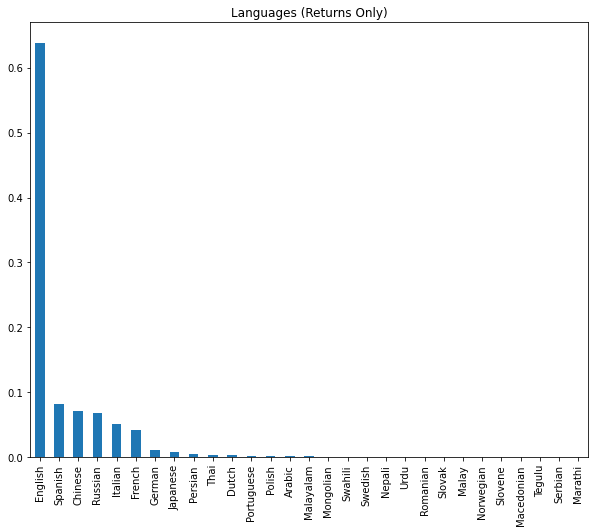

In [20]:
df_returned['language'].value_counts(normalize=True).plot(kind='bar', title="Languages (Returns Only)", figsize=(10,8))

In [21]:
print("Top 5 Languages (Returns Only)")
df_returned['language'].value_counts(normalize=True).sort_values(ascending=False).head(5)

Top 5 Languages (Returns Only)


English    0.637760
Spanish    0.082357
Chinese    0.071365
Russian    0.067566
Italian    0.051726
Name: language, dtype: float64

## Access Method Distribution

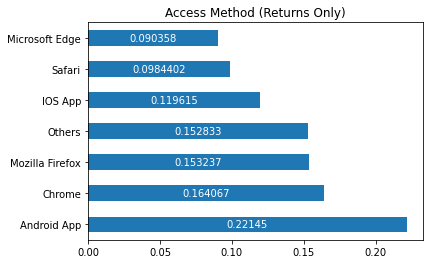

In [22]:
ax = df_returned['accessed_Ffom'].value_counts(normalize=True).plot(kind='barh', title="Access Method (Returns Only)")
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white')

## Country Distribution

<Axes: title={'center': 'Country (Returns Only)'}>

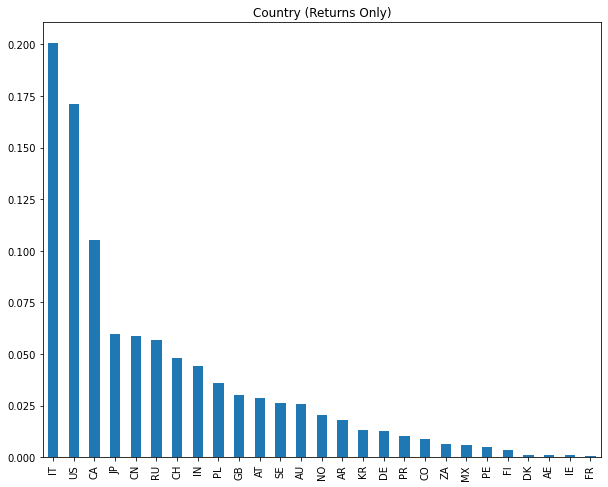

In [23]:
df_returned['country'].value_counts(normalize=True).plot(kind='bar', title="Country (Returns Only)", figsize=(10,8))

In [24]:
print("Top 5 Countries (Returns Only)")
df_returned['country'].value_counts(normalize=True).sort_values(ascending=False).head(5)

Top 5 Countries (Returns Only)


IT    0.200598
US    0.171260
CA    0.105148
JP    0.059646
CN    0.058838
Name: country, dtype: float64